In [1]:
import sys,os
path=os.path.dirname(os.getcwd())
sys.path.append(path)
from unityagents  import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#for 20 agents: 
env = UnityEnvironment(file_name=path+'/Reacher_Windows_x86_64_20/Reacher.exe')
#for 1 agent:
# env = UnityEnvironment(file_name=path+'/Reacher_Windows_x86_64/Reacher.exe')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [1]:
from ddpg_agent import *
from ddpg_train import *
# In case you want to just check the agent (not train or watch) uncomment below
# state_size=33
# action_size=4

In [3]:
agent = ddpg_agent(state_size,action_size,batch_size=128,buffer_size=1000000,gamma=0.99,tau=0.001,lr_actor=0.001,
                   lr_critic=0.001,weight_decay=0,update_every=20,learn_num=10,random_seed=1)

In [6]:
mean_scores,min_scores,max_scores,moving_avgs,stats=ddpg_train(agent,env,brain_name,n_episodes=500, max_t=1000,
                                                               target_score=30.0,
                                                               window_size=100, print_every=1, train_mode=True)

Episode 1 (214 sec)  -- 	Min: 0.1	Max: 1.7	Mean: 0.6	Mov. Avg: 0.6
Episode 2 (210 sec)  -- 	Min: 0.5	Max: 2.8	Mean: 1.5	Mov. Avg: 1.0
Episode 3 (213 sec)  -- 	Min: 0.6	Max: 5.7	Mean: 2.5	Mov. Avg: 1.5
Episode 4 (223 sec)  -- 	Min: 1.3	Max: 5.0	Mean: 3.3	Mov. Avg: 2.0
Episode 5 (224 sec)  -- 	Min: 1.9	Max: 8.2	Mean: 4.2	Mov. Avg: 2.4
Episode 6 (224 sec)  -- 	Min: 2.0	Max: 6.6	Mean: 4.7	Mov. Avg: 2.8
Episode 7 (226 sec)  -- 	Min: 3.1	Max: 18.5	Mean: 6.6	Mov. Avg: 3.3
Episode 8 (222 sec)  -- 	Min: 4.2	Max: 12.0	Mean: 8.2	Mov. Avg: 4.0
Episode 9 (216 sec)  -- 	Min: 5.5	Max: 12.5	Mean: 8.0	Mov. Avg: 4.4
Episode 10 (218 sec)  -- 	Min: 6.6	Max: 15.3	Mean: 10.7	Mov. Avg: 5.0
Episode 11 (218 sec)  -- 	Min: 7.6	Max: 15.2	Mean: 11.3	Mov. Avg: 5.6
Episode 12 (220 sec)  -- 	Min: 8.3	Max: 17.9	Mean: 12.4	Mov. Avg: 6.2
Episode 13 (223 sec)  -- 	Min: 8.6	Max: 21.6	Mean: 14.4	Mov. Avg: 6.8
Episode 14 (226 sec)  -- 	Min: 8.8	Max: 19.9	Mean: 14.2	Mov. Avg: 7.3
Episode 15 (226 sec)  -- 	Min: 9.5	Max: 20.4

Plotting the results above. Notice moving average reached above 30 by 90 episodes!

Episode 100	Average Score: 30.96

Environment solved in 100 episodes!	Average Score: 30.96


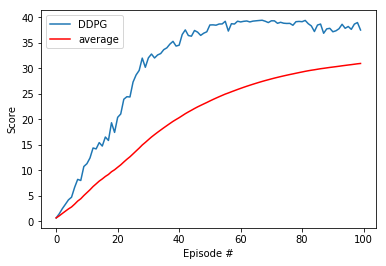

In [4]:
from plot_saved_results import *
plot_results(f'Checkpoints/scoresDDPG1e61280.991e-31e-31e-302010sigma0.02theta0.04seed1solved100','DDPG')

Loading the best agent and watching it play one episode:

In [6]:
agent.actor_local.load_state_dict(torch.load(f'Checkpoints/actor_ckpt_1e61280.991e-31e-31e-302010sigma0.02theta0.04seed1.pth',map_location=device))
agent.critic_local.load_state_dict(torch.load(f'Checkpoints/critic_ckpt_1e61280.991e-31e-31e-302010sigma0.02theta0.04seed1.pth',map_location=device))

In [ ]:
from agent_play import *
score_list=agent_play(agent,env,brain_name,train_mode=False,view_episodes=1)

In [ ]:
env.close()

Testing the `OUNoise` at different scales with different `sigma` and `theta` values:

In [52]:
agent.noise.sigma=0.2
agent.noise.theta=0.15
testou=[]
for _ in range(1000):
    testou.append(agent.noise.sample())
agent.noise.reset()
print("for sigma=0.2 and theta=0.15")
print("average over 1000 steps:",np.mean(np.abs(testou)))
testou=[]
for _ in range(1000):
    for _ in range(1000):
        agent.noise.sample()
    testou.append(agent.noise.sample())
    agent.noise.reset()
print("average over each 1000th step over 1,000,000 steps:",np.mean(np.abs(testou)))

agent.noise.sigma=0.02
agent.noise.theta=0.04
testou=[]
for _ in range(1000):
    testou.append(agent.noise.sample())
agent.noise.reset()
print("for sigma=0.02 and theta=0.04")
print("average over 1000 steps:",np.mean(np.abs(testou)))
testou=[]
for _ in range(1000):
    for _ in range(1000):
        agent.noise.sample()
    testou.append(agent.noise.sample())
    agent.noise.reset()
print("average over each 1000th step over 1,000,000 steps:",np.mean(np.abs(testou)))

for sigma=0.2 and theta=0.15
average over 1000 steps: 0.31891974557265346
average over each 1000th step over 1,000,000 steps: 0.3051923804639788
for sigma=0.02 and theta=0.04
average over 1000 steps: 0.05971867422804449
average over each 1000th step over 1,000,000 steps: 0.057779701850004445
